There are **n** cities labeled from 0 to n-1 with **m** edges connecting them. Given the array **edges** where **edges[i] = [from<sub>i</sub> , to<sub>i</sub> ,weight<sub>i</sub>]**  represents a **bidirectional** and **weighted edge** between cities **from<sub>i</sub>** and **to<sub>i</sub>**, and given the integer **distanceThreshold**. You need to find out a city with the **smallest number** of cities that are reachable through some path and whose distance is **at most Threshold Distance**. If there are multiple such cities, our answer will be the city with the **greatest label**.

**Note:** The distance of a path connecting cities ***i*** and ***j*** is equal to the sum of the edge's weights along that path.

<br>

**Example 1:**
>**Input:**<br>
>n = 4, m = 4<br>
>edges = [[0, 1, 3],<br>
>&emsp;&emsp;&emsp;&emsp; [1, 2, 1], <br>
>&emsp;&emsp;&emsp;&emsp; [1, 3, 4],  <br>
>&emsp;&emsp;&emsp;&emsp; [2, 3, 1]]<br>
>distanceThreshold = 4<br>
>**Output:**<br>
>3<br>
>**Explaination:**<br>
>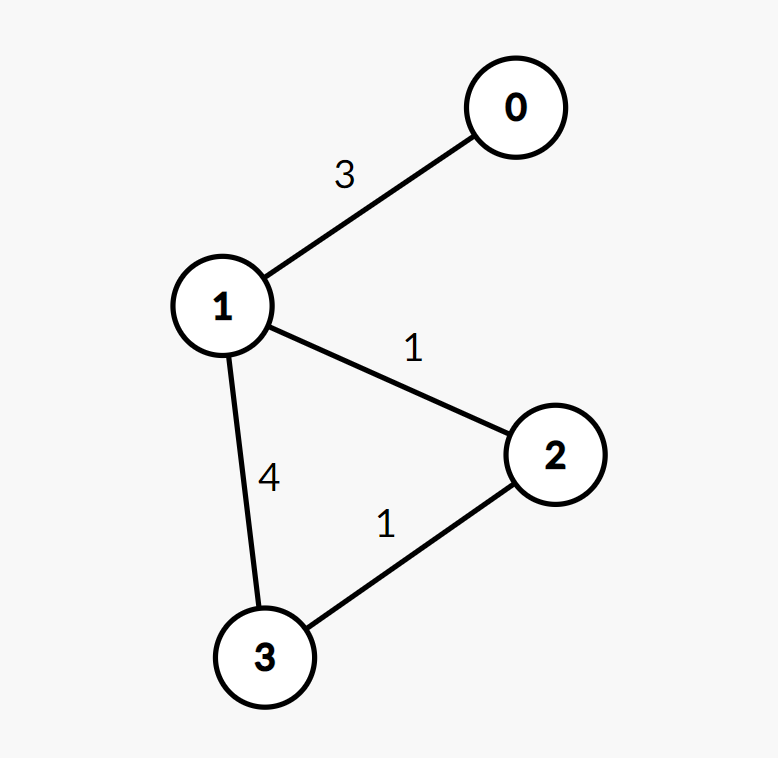<br>
>The neighboring cities at a distanceThreshold = 4 for each city are:<br>
>City 0 -> [City 1, City 2] <br>
>City 1 -> [City 0, City 2, City 3] <br>
>City 2 -> [City 0, City 1, City 3] <br>
>City 3 -> [City 1, City 2] <br>
>Cities 0 and 3 have 2 neighboring cities at a distanceThreshold = 4, but we have to return city 3 since it has the greatest number.

**Example 2:**
>**Input:** <br>
>n = 5, m = 6<br>
>edges = [[0, 1, 2],<br>
>&emsp;&emsp;&emsp;&emsp; [0, 4, 8],<br>
>&emsp;&emsp;&emsp;&emsp; [1, 2, 3], <br>
>&emsp;&emsp;&emsp;&emsp; [1, 4, 2], <br>
>&emsp;&emsp;&emsp;&emsp; [2, 3, 1],<br>
>&emsp;&emsp;&emsp;&emsp; [3, 4, 1]]<br>
>distanceThreshold = 2.<br>
>**Output:**<br>
>0<br>
>**Explaination:**<br>
>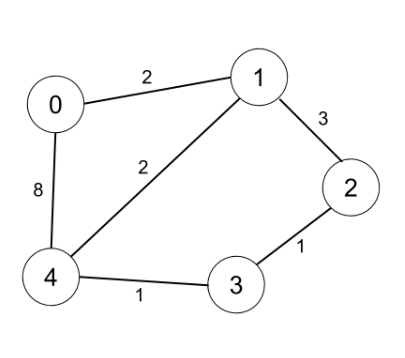<br>
>The neighboring cities at a distanceThreshold = 2 for each city are:<br>
>City 0 -> [City 1] <br>
>City 1 -> [City 0, City 4] <br>
>City 2 -> [City 3, City 4] <br>
>City 3 -> [City 2, City 4]<br>
>City 4 -> [City 1, City 2, City 3] <br>
>The city 0 has 1 neighboring city at a distanceThreshold = 2.

<br>

**Your Task:**<br>
You don't need to read input or print anything. Your task is to complete the function **findCity()** which takes a number of nodes **n**, total number of edges **m** and vector of **edges** and **distanceThreshold**. and return the city with the smallest number of cities that are reachable through some path and whose distance is **at most** Threshold Distance. If there are multiple such cities, return the city with the greatest label.

**Expected Time Complexity:** O(n<sup>2</sup> + length(edges) * nlog(n))<br>
**Expected Auxiliary Space:**  O(n<sup>3</sup>)

**Constraints:**
- >1  ≤  n ≤  100
- >1 <= m <= n*(n-1)/2
- >length(edges[i]) == 3
- >0 <= from<sub>i</sub> < to<sub>i</sub> < n
- >1 <= weight<sub>i</sub> distanceThreshold <= 10<sup>4</sup>
- >All pairs (from<sub>i</sub>, to<sub>i</sub>) are distinct

In [1]:
class Solution:
    def findCity(self, n : int, m : int, edges : list[list[int]], distanceThreshold : int) -> int:
        # code here
        import heapq
        
        adj = [[] for _ in range(n)]
        for it in edges:
            adj[it[0]].append((it[1], it[2]))
            adj[it[1]].append((it[0], it[2]))

        city_no = -1
        min_city_count = float('inf')

        for i in range(n):
            dist = [float('inf')] * n
            pq = [(0, i)]
            dist[i] = 0

            while pq:
                distance, node = heapq.heappop(pq)
                for adj_node, adj_weight in adj[node]:
                    if distance + adj_weight < dist[adj_node]:
                        dist[adj_node] = distance + adj_weight
                        heapq.heappush(pq, (dist[adj_node], adj_node))

            count = sum(1 for j in range(n) if dist[j] <= distanceThreshold)
            if count <= min_city_count:
                min_city_count = count
                city_no = i

        return city_no